Vamos importar o dataset de DDoS do site Hugging Face: https://huggingface.co/datasets/rhyssh/DDOS18/tree/main

A primeira etapa é entender o dataset e quais informações podem ser obtidas a partir dele

In [ ]:
import pandas as pd
from datasets import Dataset

# Replace 'your_file.csv' with the actual path to your CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/DDOS02142018.csv')

In [ ]:
# Display the first 10 rows of the DataFrame
print(df.head(10))

   Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0         0         0  14/02/2018 08:31:01      112641719             3   
1         0         0  14/02/2018 08:33:50      112641466             3   
2         0         0  14/02/2018 08:36:39      112638623             3   
3        22         6  14/02/2018 08:40:13        6453966            15   
4        22         6  14/02/2018 08:40:23        8804066            14   
5        22         6  14/02/2018 08:40:31        6989341            16   
6         0         0  14/02/2018 08:39:28      112640480             3   
7         0         0  14/02/2018 08:42:17      112641244             3   
8        80         6  14/02/2018 08:47:14         476513             5   
9        80         6  14/02/2018 08:47:15         475048             5   

   Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0             0                0                0                0   
1             0                0  

In [ ]:
# Create a DataFrame with column names and their data types
column_info = pd.DataFrame({'Column Name': df.columns, 'Data Type': df.dtypes})

# Display the DataFrame as a table
display(column_info)

,Column Name,Data Type
Dst Port,Dst Port,int64
Protocol,Protocol,int64
Timestamp,Timestamp,object
Flow Duration,Flow Duration,int64
Tot Fwd Pkts,Tot Fwd Pkts,int64
...,...,...
Idle Mean,Idle Mean,float64
Idle Std,Idle Std,float64
Idle Max,Idle Max,int64
Idle Min,Idle Min,int64


Podemos ver quais portas são as mais visadas utilizando um gráfico de frequência

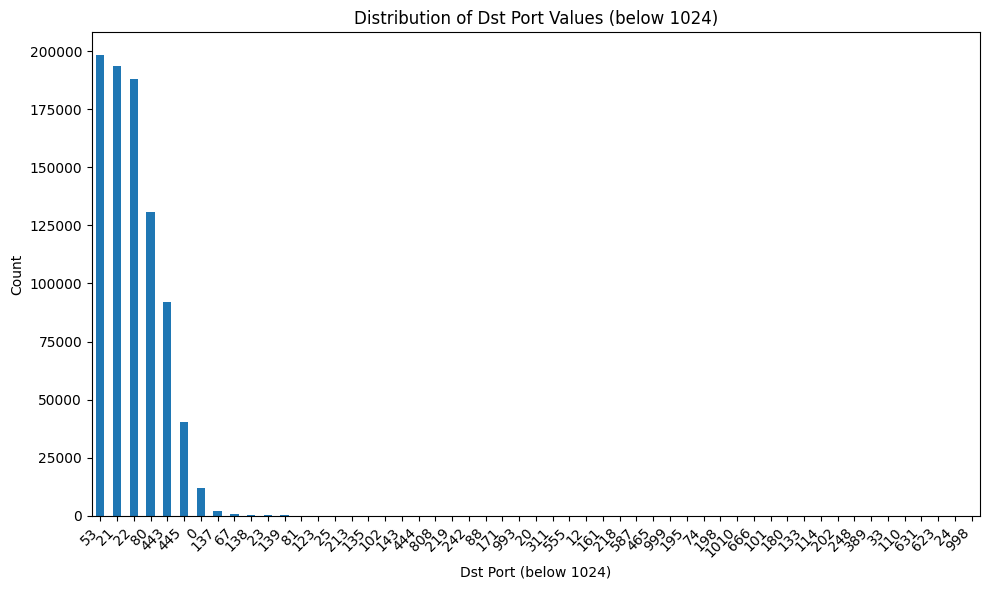

In [ ]:
import matplotlib.pyplot as plt

# Filter values lower than 1024
filtered_df = df[df['Dst Port'] < 1024]

# Count the occurrences of each unique value in the filtered 'Dst Port' column
dst_port_counts = filtered_df['Dst Port'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
dst_port_counts.plot(kind='bar')
plt.xlabel('Dst Port (below 1024)')
plt.ylabel('Count')
plt.title('Distribution of Dst Port Values (below 1024)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

Mean Flow Duration: 6255554.608775719


<ipython-input-17-36c370c0bca5>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df['Duration Buckets'] = pd.cut(sampled_df['Flow Duration'], bins=bins, labels=labels)


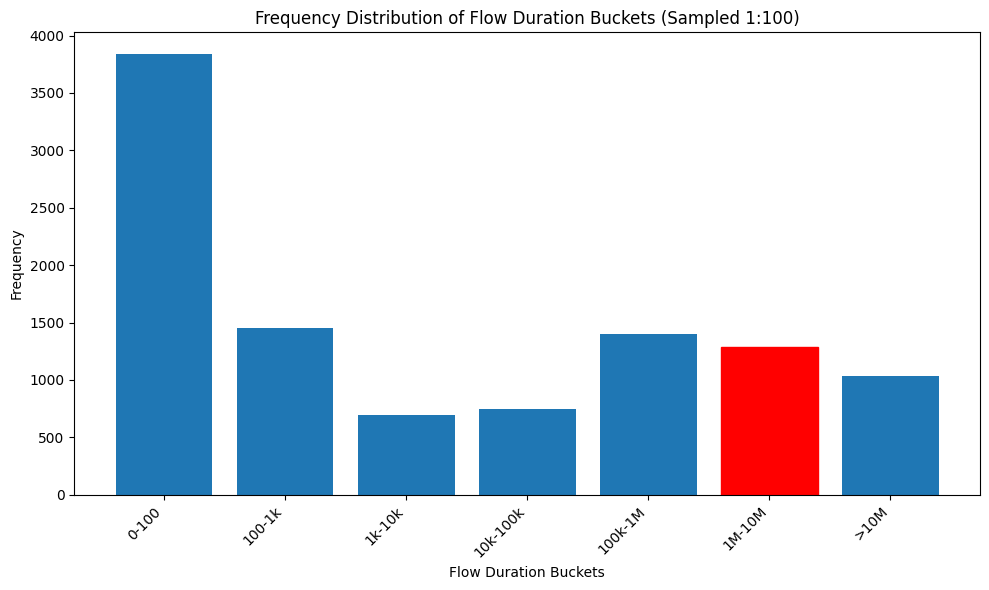

In [ ]:
# Sample the DataFrame 1:100
sampled_df = df.iloc[::100, :]

# Calculate the mean of 'Flow Duration'
mean_flow_duration = df['Flow Duration'].mean()
print("Mean Flow Duration:", mean_flow_duration)

# Sample the DataFrame 1:100
sampled_df = df.iloc[::100, :]

# Define the buckets (intervals) for flow duration
bins = [0, 100, 1000, 10000, 100000, 1000000, 10000000, float('inf')]  # Customize these as needed

# Create labels for the buckets
labels = ['0-100', '100-1k', '1k-10k', '10k-100k', '100k-1M', '1M-10M', '>10M']

# Categorize the 'Flow Duration' values into buckets
sampled_df['Duration Buckets'] = pd.cut(sampled_df['Flow Duration'], bins=bins, labels=labels)

# Calculate frequency distribution for the buckets, preserving category order
bucket_counts = sampled_df['Duration Buckets'].value_counts().sort_index()

# Calculate the mean of 'Flow Duration'
mean_flow_duration = sampled_df['Flow Duration'].mean()

# Find the bucket containing the mean value
mean_bucket = pd.cut([mean_flow_duration], bins=bins, labels=labels)[0]

# Create a bar plot for the bucket frequencies
plt.figure(figsize=(10, 6))
bars = plt.bar(bucket_counts.index, bucket_counts.values)

# Color the bar corresponding to the mean bucket in red
for i, label in enumerate(bucket_counts.index):
    if label == mean_bucket:
        bars[i].set_color('red')

plt.xlabel('Flow Duration Buckets')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Flow Duration Buckets (Sampled 1:100)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()